# Principal Component Analysis
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement **Principal Component Analysis** and apply it to **restore rotated CAPTCHA**
- play with **Eigenface** by applying PCA on a real world face dataset
- use PCA to do **dimension reduction**. Evaluate the loss of information qualitatively and quantitatively

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked to.

In [70]:
# some basic imports
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Now let's hack the rotated CAPTCHA!

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


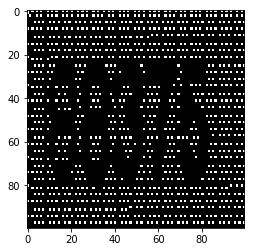

In [273]:
from hack_pca import hack_pca

# Hack different images yourself
img = hack_pca('4.gif')

plt.imshow(img)

## Apply PCA on face image

(1024,)


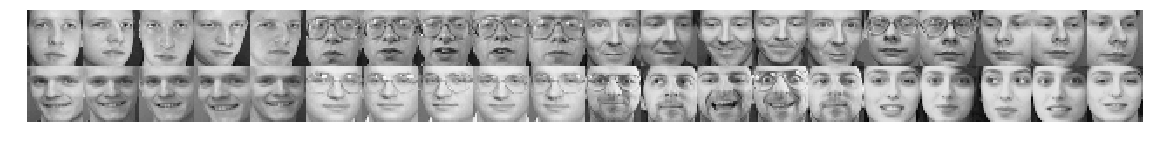

In [297]:
from pca import PCA
from knn import knn
# load data
ORL_data = sio.loadmat('ORL_data.mat')
fea_Train = ORL_data['fea_Train']
gnd_Train = ORL_data['gnd_Train'].reshape(-1)
fea_Test = ORL_data['fea_Test']
gnd_Test = ORL_data['gnd_Test'].reshape(-1)
# YOUR CODE HERE


# 1. Feature preprocessing
# begin answer
fea_Train_mean = np.mean(fea_Train, axis = 1, )
fea_Train_std = 
# end answer
from show_face import show_face
show_face(fea_Train)

/Users/basasuya/Desktop/CD_ML_assigments/assignment4/ml2018winter_hw4/pca/pca.py:25: ComplexWarning: Casting complex values to real discards the imaginary part


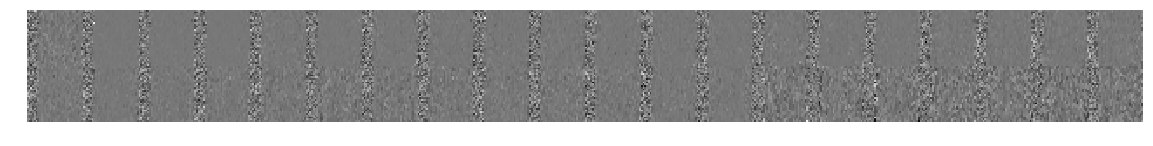

In [235]:
# 2. Run PCA
# begin answer
e_vec, e_val = PCA(fea_Train)
# end answer
# 3. Visualize eigenface
# begin answer
show_face(e_vec)
# end answer

85.0


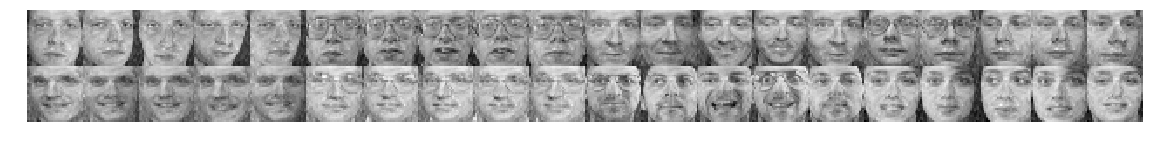

In [296]:
dim = 128
# 4. Project data on to low dimensional space
# begin answer
newfea_Train = np.dot(fea_Train, e_vec[:,:dim])
newfea_Test = np.dot(fea_Test, e_vec[:,:dim])
# end answer

# 5. Run KNN in low dimensional space
# begin answer
result = knn(newfea_Test, newfea_Train, gnd_Train, 1)
cnt = 0
for i in range(result.shape[0]):
    if(gnd_Test[i] == result[i][0]):
        cnt = cnt + 1
rate = cnt / result.shape[0] * 100
print(rate)
# end answer
# 6. Recover face images form low dimensional space, visualize them
# begin answer
show_face(np.dot(e_vec[:,:dim], newfea_Train.T).T)
# end answer  

75.5
80.0
82.0
85.0
85.0


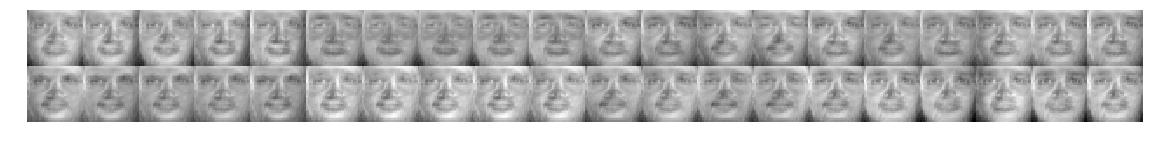

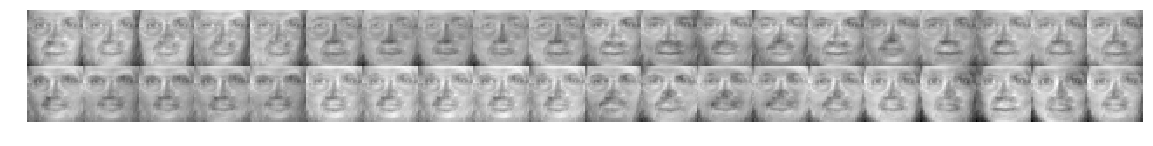

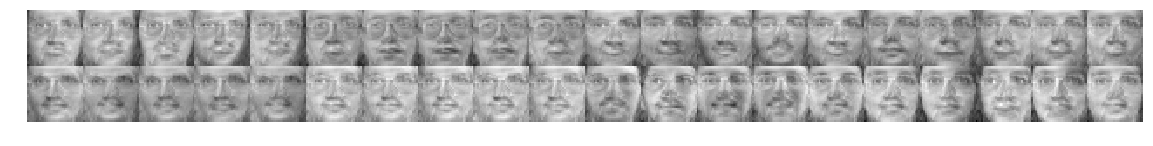

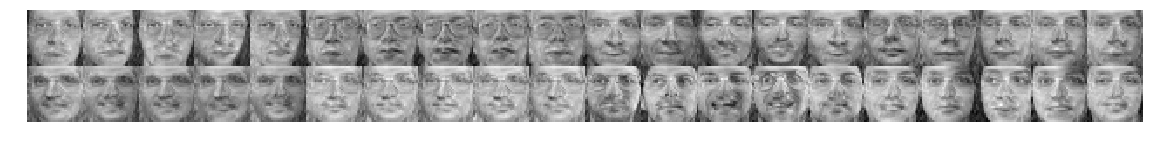

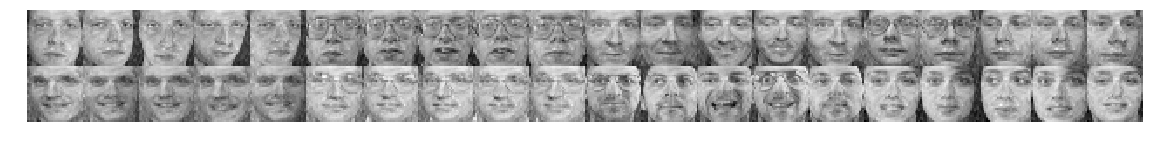

In [299]:
dims = [8, 16, 32, 64, 128]
for dim in dims:
    newfea_Train = np.dot(fea_Train, e_vec[:,:dim])
    newfea_Test = np.dot(fea_Test, e_vec[:,:dim])
    result = knn(newfea_Test, newfea_Train, gnd_Train, 1)
    cnt = 0
    for i in range(result.shape[0]):
        if(gnd_Test[i] == result[i][0]):
            cnt = cnt + 1
    rate = cnt / result.shape[0] * 100
    print(rate)
    show_face(np.dot(e_vec[:,:dim], newfea_Train.T).T)
 

## You are encouraged to apply LDA on this dataset!

In [ ]:
from LDA import LDA

# Your code here
# begin answer
# end answer